In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Section 1. Load and Visualise the Data
- Download
- Load 
- Visualise
- Normalisation

-0.03779466168006854 0.9920801322508517


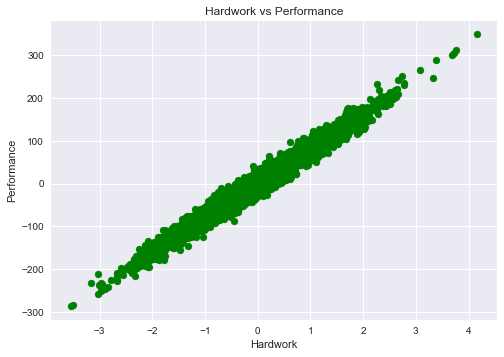

In [7]:
# Load
X = pd.read_csv('./Training Data/Linear_X_Train.csv')
y = pd.read_csv('./Training Data/Linear_Y_Train.csv')

# Convert X, to Numpy arrays
X=X.values
y=y.values

#Normalisation
u = X.mean()
std = X.std()
print(u,std)
X=(X-u)/std
# Visualise
plt.style.use('seaborn')
plt.scatter(X,y,color="green")
plt.title('Hardwork vs Performance')
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.show()

In [8]:
X.shape, y.shape

((3750, 1), (3750, 1))

### Section 2 - Linear Regression 

In [9]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x=X[i]
        y_ = hypothesis(x, theta)
        y=Y[i]
        grad[0] +=(y_ - y)
        grad[1] +=(y_ - y)*x
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_=hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
        
    return total_error/m

def gradientDescent(X,Y,max_steps =100,learning_rate=0.1):
    
    theta = np.zeros((2,))
    error_list = []
    
    for i in range(max_steps):
        
        # Compute grad
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
 
        #Update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
    return theta,error_list

    

In [10]:
theta,error_list =gradientDescent(X,y)

In [11]:
theta

array([ 0.6838508 , 79.90361453])

In [12]:
# error_list

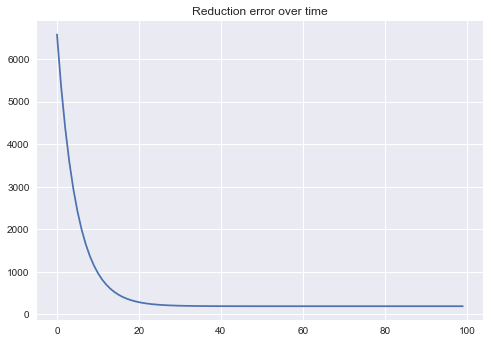

In [14]:
plt.plot(error_list)
plt.title("Reduction error over time")
plt.show()

### Section -3 Predictions and Best Line

In [15]:
y_ = hypothesis(X,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


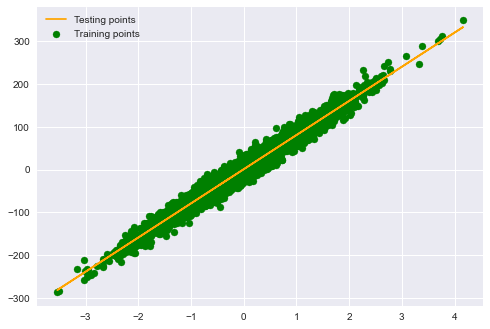

In [19]:
# Training + Predictions
plt.scatter(X,y,color="green",label="Training points")
plt.plot(X,y_,color='orange',label="Testing points")
plt.legend()
plt.show()

In [53]:
# Load the test data
X_test = pd.read_csv('./Test Cases/Linear_X_Test.csv')
y_test = hypothesis(X_test,theta)

# y_test.shape

(1250, 1)

In [54]:
df=pd.DataFrame(data=y_test,columns=["y"])


In [55]:
df.to_csv('y_prediction.csv',index=False)

### Section - 4 Computing Score
**Score** : R2(R-squared) or Coefficient of Determination

In [58]:
def r2_score(Y,Y_):
    
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y-Y.mean())**2)
    
    score = (1-num/denom)
    return score*100

In [59]:
r2_score(y,y_) 

97.09612226971643

### Section 5 Visualising Loss Function

In [61]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [62]:
theta

array([ 0.6838508 , 79.90361453])

In [70]:
# Loss Actually
T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
# print(T1)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((y-y_)**2)
print(J.shape)
print(T0.shape)



(80, 80)
(80, 80)


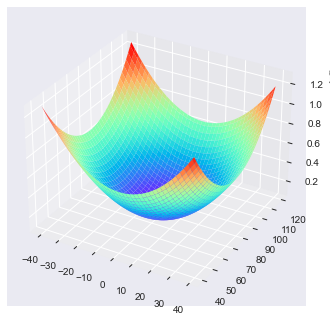

In [73]:
# Visualise the J (loss)

fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap="rainbow")
plt.show()